<a href="https://colab.research.google.com/github/Bart0lo/curso_estadistica_descriptiva/blob/main/05_Procesamiento_datos_numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalamiento de datos numéricos

### Transformaciones lineales

In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.43902714, -1.13316665, -0.82730616, -0.52144568, -0.21558519,
         0.0902753 ,  0.39613578,  0.70199627,  1.00785676,  1.31371724,
         1.61957773]),
 <BarContainer object of 10 artists>)

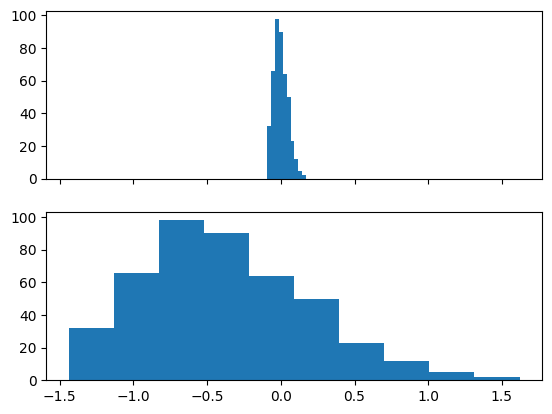

In [ ]:
# escalamiento max-min

max_raw = max(raw)
min_raw = min(raw)

scaled= (2 * raw - min_raw - max_raw) / max_raw - min_raw

fig, axs = plt.subplots(2,1,sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)






(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

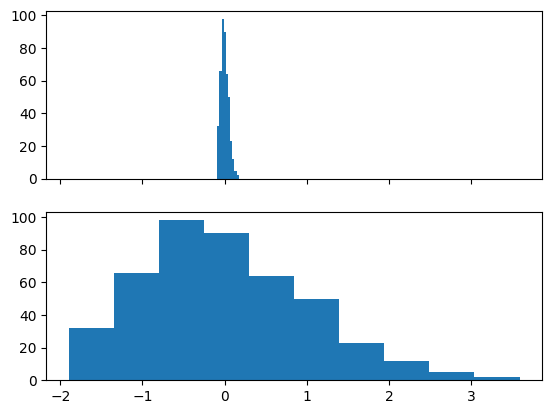

In [ ]:
# normalización Z-score

miu = np.mean(raw)
std = np.std(raw)

z_scaled = (raw - miu)/std

fig, axs = plt.subplots(2,1,sharex=True)
axs[0].hist(raw)
axs[1].hist(z_scaled)

In [ ]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.025493263001408195 
trainning time for scaled data : 0.020777198998985114
trainning time for z_scaled data : 0.023342734999459935


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [ ]:
df = pd.read_csv('/work/platzi-curso-estadistica-descriptiva-2021/cars.csv')
df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83


<AxesSubplot:>

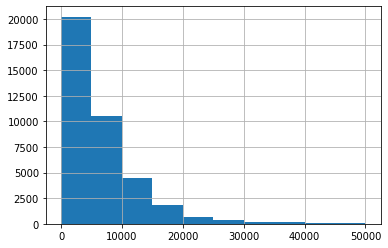

In [ ]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot:>

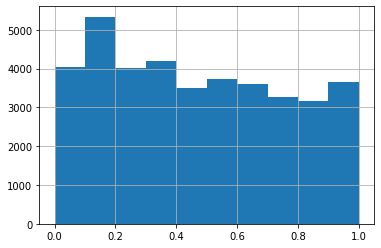

In [ ]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebf36962-a640-448e-88bb-60200c86a4dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>